In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('datasets/hhmusedata/exams.csv')

In [6]:
df

,exam_id,acquisition_date,patient_id,age,is_male,weight,height,ventricular_rate,atrial_rate,patient_ID_2,...,AdmissionType_,AdmissionRZP,AdmissionRZP_,VisitReason,VisitReason_,VisitType,VisitType_,DgCode,DischargeTo_Agg,DischargeTo_unit_agg
0,1,01-01-2023,1afba52c8512eec4ad66b9a3f0cbdbfc2f64538d,44,1,-1,-1,140,280,54,...,bez doporučení,NaN,? typ záchranky,3,palpitace,2,opakovaná návštěva,"I48.3: Typický flutter síní, EKV na SR",outpatient,NaN
1,2,01-01-2023,1afba52c8512eec4ad66b9a3f0cbdbfc2f64538d,44,1,-1,-1,92,92,54,...,bez doporučení,NaN,? typ záchranky,3,palpitace,2,opakovaná návštěva,"I48.3: Typický flutter síní, EKV na SR",outpatient,NaN
2,3,01-01-2023,195f58953b88018a04cd265dfa3461dee0ecbdc9,-1,1,-1,-1,61,61,193,...,přes RZP/LSPP,P,Praha,2,dušnost,2,opakovaná návštěva,I50.1: Selhání levé komory,outpatient,NaN
3,4,01-01-2023,d5a4edfaf83ea43eb4e7579519586be3142bbc14,-1,1,-1,-1,118,90,166,...,přes RZP/LSPP,S2,středočeská sekundární,1,bolest na hrudi,1,první návštěva,I21.2: Akutní transmurální infarkt myokardu ji...,cardiology clinic,OIP
4,5,01-01-2023,1dfee4008a42a65334fdabe38fc95ee189f7e892,-1,1,-1,-1,58,58,1153,...,bez doporučení,NaN,? typ záchranky,1,bolest na hrudi,1,první návštěva,R07.4: Nekardiální bolest na hrudi,outpatient,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33518,33519,12-02-2017,70b480cd8e21aa8c96f4021b3ff1e14576223127,69,1,-1,-1,80,138,2724,...,bez doporučení,NaN,? typ záchranky,3,palpitace,2,opakovaná návštěva,I48.9: Recidiva fibrilace síní,outpatient,NaN
33519,33520,12-03-2017,c3fd929cd32c2e139c1f37ed2e872fcf3241999f,79,0,-1,-1,67,56,1895,...,bez doporučení,NaN,? typ záchranky,9,jiný,2,opakovaná návštěva,I50.0: Pravostranná kard. dekompenzace,cardiology clinic,IMP
33520,33521,12-03-2017,f8a650b71995d54093ddbac22e37265fc79b1c4f,57,0,-1,-1,77,77,2653,...,bez doporučení,NaN,? typ záchranky,1,bolest na hrudi,1,první návštěva,"R07.4: Bolest hrudi, vyloučen AKS",outpatient,NaN
33521,33522,12-03-2017,e8fa47f207e5fa072a9dc593918e76d9b4f34ee5,75,1,-1,-1,136,144,11071,...,z jiné nemocnice,NaN,? typ záchranky,3,palpitace,2,opakovaná návštěva,"I48.9: Fibrilace síní primozáchyt, EKV navozen SR",outpatient,NaN


In [7]:
import matplotlib.pyplot as plt

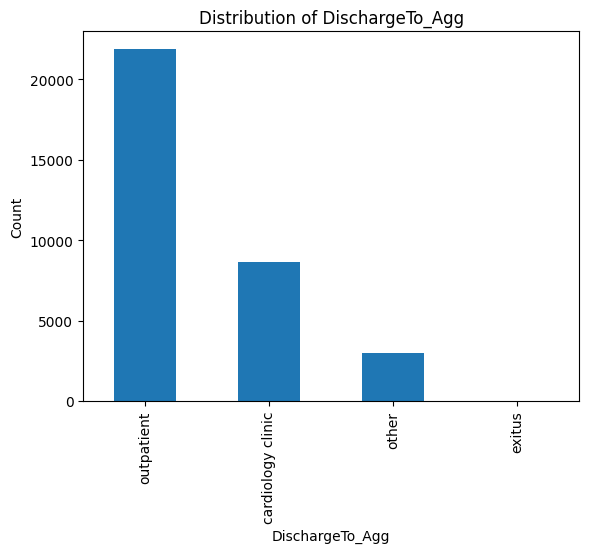

In [8]:
df['DischargeTo_Agg'].value_counts().plot(kind='bar')

plt.title('Distribution of DischargeTo_Agg')
plt.xlabel('DischargeTo_Agg')
plt.ylabel('Count')
plt.show()

In [9]:
grouped = df.groupby(['DischargeTo_Agg']).size().reset_index(name='Count')
print(grouped)


     DischargeTo_Agg  Count
0  cardiology clinic   8643
1             exitus      1
2              other   2988
3         outpatient  21891


In [10]:
df['DischargeTo_Agg'] = df['DischargeTo_Agg'].fillna('Unknown')
df['DischargeTo_unit_agg'] = df['DischargeTo_unit_agg'].fillna('Unknown')

In [11]:
grouped.reset_index(inplace=True)

grouped.rename(columns={'index': 'hh_class'}, inplace=True)

grouped

,hh_class,DischargeTo_Agg,Count
0,0,cardiology clinic,8643
1,1,exitus,1
2,2,other,2988
3,3,outpatient,21891


In [12]:
df.groupby(['DischargeTo_Agg', 'VisitReason']).size().reset_index(name='Count').pivot_table(index='DischargeTo_Agg', columns='VisitReason', values='Count', aggfunc='sum').fillna(0)

VisitReason,1,2,3,4,9
DischargeTo_Agg,,,,,
cardiology clinic,3900.0,2161.0,544.0,398.0,1640.0
exitus,1.0,0.0,0.0,0.0,0.0
other,376.0,1158.0,308.0,79.0,1067.0
outpatient,4194.0,2682.0,9813.0,197.0,5005.0


In [13]:
df['dgcode_short'] = df['DgCode'].str.split(':').str[0]

In [14]:
df.groupby(['dgcode_short', 'DischargeTo_Agg']).size().reset_index(name='Count').pivot_table(index='dgcode_short', columns='DischargeTo_Agg', values='Count', aggfunc='sum').fillna(0)

DischargeTo_Agg,cardiology clinic,exitus,other,outpatient
dgcode_short,,,,
A04.8,0.0,0.0,0.0,1.0
A04.9,2.0,0.0,2.0,0.0
A08.1,0.0,0.0,0.0,1.0
A08.4,1.0,0.0,0.0,0.0
A09.0,1.0,0.0,3.0,3.0
...,...,...,...,...
Z95.4,3.0,0.0,1.0,1.0
Z95.8,0.0,0.0,0.0,2.0
Z95.9,0.0,0.0,0.0,6.0


In [22]:
import numpy as np
from scipy.stats import entropy

def calculate_entropy(df, col1, col2):
    # Calculate the probabilities
    probs = pd.crosstab(df[col1], df[col2]) / len(df)

    # Calculate the entropy
    entropy = -np.sum(probs.apply(lambda x: x * np.log2(x)))

    return entropy

In [23]:
calculate_entropy(df, 'dgcode_short', 'DischargeTo_Agg')

/scratch.ssd/sejakm/job_18836707.meta-pbs.metacentrum.cz/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/scratch.ssd/sejakm/job_18836707.meta-pbs.metacentrum.cz/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


DischargeTo_Agg
cardiology clinic    1.874725
exitus               0.000448
other                0.843950
outpatient           3.390474
dtype: float64

In [32]:
from scipy.stats import entropy

def calculate_conditional_entropy(df, X, Y):
    # Calculate the probabilities
    probs = pd.crosstab(df[X], df[Y])

    # Calculate the conditional entropy
    conditional_entropy = np.mean(probs.apply(lambda x: entropy(x), axis=1))

    return conditional_entropy

In [33]:
calculate_conditional_entropy(df, 'dgcode_short', 'DischargeTo_Agg')

165.9958275261837

In [37]:
pd.crosstab(df['dgcode_short'], df['DischargeTo_Agg']).apply(lambda x: entropy(x), axis=1).mean()

0.26223669435416064